## Trabalho de Machine Learning - FIAP

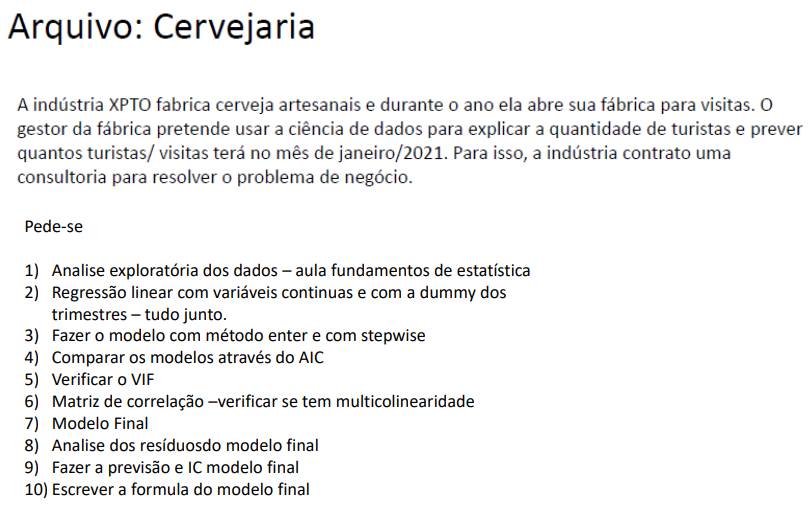

## **Bibliotecas**

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

%matplotlib inline

## **Base de dados**

In [159]:
df = pd.read_excel("cervejaria.xlsx")
df.head()

,visitas,excursoes,preco,ano,trimestre,data
0,86947.0,115.0,4.6,2014,1,Q1 2014
1,134868.0,135.0,5.1,2014,2,Q2 2014
2,143617.0,155.0,5.3,2014,3,Q3 2014
3,102210.0,157.0,4.6,2014,4,Q4 2014
4,93407.0,110.0,4.5,2015,1,Q1 2015


In [160]:
df.drop('data', axis=1, inplace=True)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visitas    28 non-null     float64
 1   excursoes  28 non-null     float64
 2   preco      28 non-null     float64
 3   ano        28 non-null     int64  
 4   trimestre  28 non-null     int64  
dtypes: float64(3), int64(2)
memory usage: 1.2 KB


In [162]:
df = pd.get_dummies(df, prefix='trimestre', columns=['trimestre'])

In [163]:
df.head()

,visitas,excursoes,preco,ano,trimestre_1,trimestre_2,trimestre_3,trimestre_4
0,86947.0,115.0,4.6,2014,1,0,0,0
1,134868.0,135.0,5.1,2014,0,1,0,0
2,143617.0,155.0,5.3,2014,0,0,1,0
3,102210.0,157.0,4.6,2014,0,0,0,1
4,93407.0,110.0,4.5,2015,1,0,0,0


In [164]:
df.describe()

,visitas,excursoes,preco,ano,trimestre_1,trimestre_2,trimestre_3,trimestre_4
count,28.000000,28.000000,28.000000,28.0000,28.000000,28.000000,28.000000,28.000000
mean,159206.214286,164.232143,4.741071,2017.0000,0.250000,0.250000,0.250000,0.250000
std,61769.643226,42.077856,0.699213,2.0367,0.440959,0.440959,0.440959,0.440959
min,59924.000000,85.000000,3.600000,2014.0000,0.000000,0.000000,0.000000,0.000000
25%,114478.500000,130.625000,4.337500,2015.0000,0.000000,0.000000,0.000000,0.000000
50%,147153.500000,167.000000,4.600000,2017.0000,0.000000,0.000000,0.000000,0.000000
75%,219222.000000,187.500000,5.150000,2019.0000,0.250000,0.250000,0.250000,0.250000
max,310199.000000,245.000000,6.350000,2020.0000,1.000000,1.000000,1.000000,1.000000


## **EDA**

In [165]:
sns.set_palette('winter_r')

### - Visitas

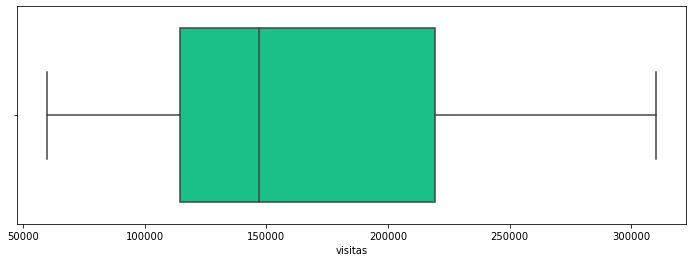

In [166]:
fig, ax = plt.subplots(figsize=(12,4))

sns.boxplot(x='visitas',
               data=df)

plt.show()

### - Excursões

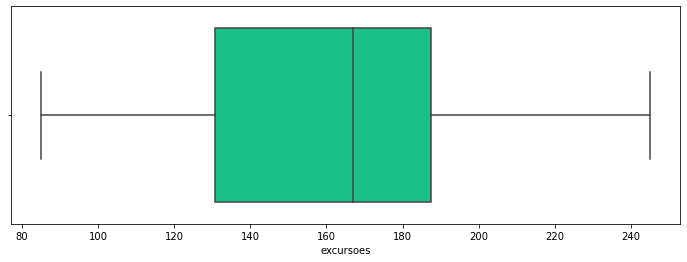

In [167]:
fig, ax = plt.subplots(figsize=(12,4))

sns.boxplot(x='excursoes',
               data=df)

plt.show()

### - Preço

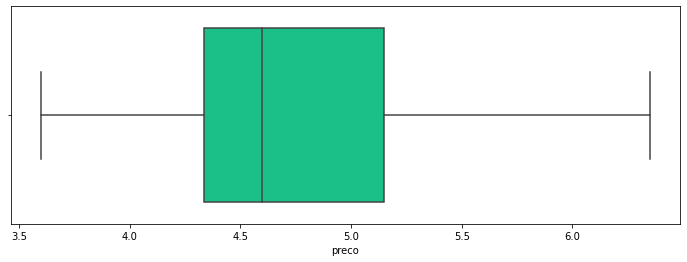

In [168]:
fig, ax = plt.subplots(figsize=(12,4))

sns.boxplot(x='preco',
               data=df)

plt.show()

### - Ano

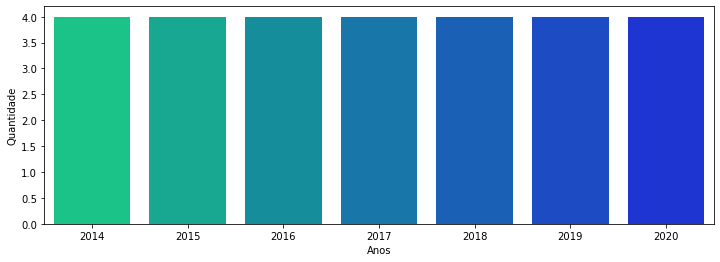

In [169]:
fig, ax = plt.subplots(figsize=(12,4))

sns.countplot(x='ano',
              palette='winter_r',
               data=df)
ax.set_xlabel('Anos')
ax.set_ylabel('Quantidade')
plt.show()

### - Todas

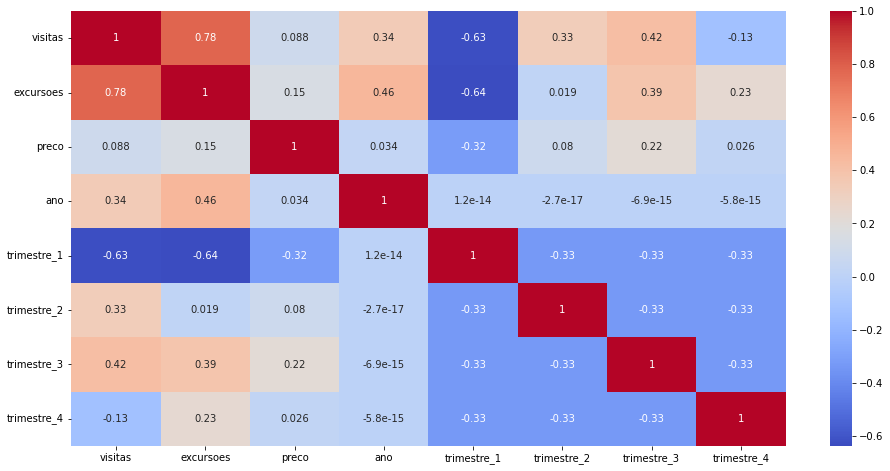

In [170]:
fig, ax = plt.subplots(figsize=(16,8))

sns.heatmap(df.corr(), 
            cmap="coolwarm",
            annot=True)

plt.show()